### Random Forest XgBoost
- Split FINAL_DATASET for train and test
- Run regression for random forest w/ different learning rates and depth
- Use CV to cross-validate the features
- Run F-Score to see feature importance (see Stephan ipynb file)

## Fuck this attempt. Not enough shot data.

- Was goal success rate 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

final_csv = pd.read_csv('../Preprocessing/Data_Structures/FINAL_BASE_DATASET_WITH_BETS_ZEROS_REMOVED_GOALS_ADDED.csv')
final_csv['home_shot_success_rate'] = 0
final_csv['away_shot_success_rate'] = 0
final_csv = final_csv.drop('Unnamed: 0', axis=1)

#print final_csv[3, 'home_team_api_id']

for index in final_csv.index:
    home_total_shots = (final_csv.loc[index,'shoton_home']+final_csv.loc[index,'shotoff_home'])
    away_total_shots = (final_csv.loc[index,'shoton_away']+final_csv.loc[index,'shotoff_away'])
    if (home_total_shots == 0):
        final_csv.loc[index, 'home_shot_success_rate'] = 0
    else:
        final_csv.loc[index, 'home_shot_success_rate'] = final_csv.loc[index,'home_team_goal']/home_total_shots
    if (away_total_shots == 0):
        final_csv.loc[index, 'away_shot_success_rate'] = 0
    else:
        final_csv.loc[index, 'away_shot_success_rate'] = final_csv.loc[index, 'away_team_goal']/away_total_shots

final_csv.head()


,away_Defender_rating,home_Defender_rating,away_Attacker_rating,home_Attacker_rating,away_Goalkeeper_rating,home_Goalkeeper_rating,away_Midfielder_rating,home_Midfielder_rating,HEAD_2_HEAD_HOME_TEAM_WINS,HEAD_2_HEAD_HOME_TEAM_LOSS,...,BWD,BWA,IWH,IWD,IWA,home_team_goal,away_team_goal,Label,home_shot_success_rate,away_shot_success_rate
0,64.500000,72.666667,67.666667,74.0,63.0,72.0,64.333333,73.833333,1.000,0.0,...,4.90,10.00,1.25,4.5,9.0,2,0,2.0,0.0,0.0
1,64.600000,65.666667,66.500000,69.0,69.0,71.0,66.000000,69.600000,1.000,0.0,...,3.60,4.60,1.65,3.3,4.4,3,1,2.0,0.0,0.0
2,64.000000,64.333333,67.000000,66.0,63.0,69.0,65.400000,65.600000,0.000,0.0,...,3.30,3.10,2.20,3.1,3.0,1,1,1.0,0.0,0.0
3,63.000000,64.750000,68.500000,65.0,71.0,65.0,69.666667,65.500000,0.000,1.0,...,3.10,2.35,2.50,3.3,2.4,0,1,0.0,0.0,0.0
4,64.666667,61.000000,67.333333,0.0,68.0,58.0,65.250000,61.000000,0.125,0.5,...,3.15,2.40,2.70,3.2,2.3,0,1,0.0,0.0,0.0


In [64]:
from collections import Counter

final_csv = pd.read_csv('../Preprocessing/Data_Structures/FINAL_BASE_DATASET_WITH_BETS_ZEROS_REMOVED_WITH_SEASON_ShotON_OFF_REMOVED_TEAM_RATINGS_ADDED.csv')
Counter(final_csv['season'])
this_season = '2015/2016'
final_csv = final_csv.drop('Unnamed: 0', axis=1)
final_csv.head()

seasons = ['2015/2016','2014/2015','2013/2014','2012/2013','2011/2012','2010/2011']


,season,away_Defender_rating,home_Defender_rating,away_Attacker_rating,home_Attacker_rating,away_Goalkeeper_rating,home_Goalkeeper_rating,away_Midfielder_rating,home_Midfielder_rating,HEAD_2_HEAD_HOME_TEAM_WINS,...,IWH,IWD,IWA,home_team_rating,away_team_rating,home_team_offensive_rating,away_team_offensive_rating,home_team_defensive_rating,away_team_defensive_rating,Label
0,2010/2011,64.500000,72.666667,67.666667,74.0,63.0,72.0,64.333333,73.833333,1.000,...,1.25,4.5,9.0,59.300000,46.287638,1.700000,1.356512,1.100000,1.317439,2
1,2010/2011,64.600000,65.666667,66.500000,69.0,69.0,71.0,66.000000,69.600000,1.000,...,1.65,3.3,4.4,46.287638,46.287638,1.356512,1.356512,1.317439,1.317439,2
2,2010/2011,64.000000,64.333333,67.000000,66.0,63.0,69.0,65.400000,65.600000,0.000,...,2.20,3.1,3.0,46.287638,69.700000,1.356512,1.900000,1.317439,0.900000,1
3,2010/2011,63.000000,64.750000,68.500000,65.0,71.0,65.0,69.666667,65.500000,0.000,...,2.50,3.3,2.4,46.287638,46.287638,1.356512,1.356512,1.317439,1.317439,0
4,2010/2011,64.666667,61.000000,67.333333,0.0,68.0,58.0,65.250000,61.000000,0.125,...,2.70,3.2,2.3,46.287638,46.287638,1.356512,1.356512,1.317439,1.317439,0


In [98]:
from sklearn.model_selection import train_test_split

seasons = ['2015/2016','2014/2015','2013/2014','2012/2013','2011/2012','2010/2011','2009/2010','2008/2009']
test_data = final_csv[final_csv['season']==seasons[0]]
train_data = pd.DataFrame()
season_datasets = []
for season in seasons:
    if (season is not seasons[0]):
        sample = final_csv[final_csv['season']==season]
        print sample.head()
        train_data = train_data.append(sample)
        season_datasets.append(train_data)

        season  away_Defender_rating  home_Defender_rating  \
318  2014/2015             70.750000                  64.6   
319  2014/2015             67.000000                  64.5   
320  2014/2015             65.000000                  63.0   
321  2014/2015             72.333333                  65.6   
322  2014/2015             64.000000                  70.6   

     away_Attacker_rating  home_Attacker_rating  away_Goalkeeper_rating  \
318                 71.00                  67.0                    73.0   
319                 68.00                  64.0                    69.0   
320                 65.50                  62.0                    68.0   
321                 69.75                  63.0                    71.0   
322                 64.50                  72.0                    69.0   

     home_Goalkeeper_rating  away_Midfielder_rating  home_Midfielder_rating  \
318                    68.0               69.666667               65.333333   
319               

In [104]:
season_datasets[6]

,season,away_Defender_rating,home_Defender_rating,away_Attacker_rating,home_Attacker_rating,away_Goalkeeper_rating,home_Goalkeeper_rating,away_Midfielder_rating,home_Midfielder_rating,HEAD_2_HEAD_HOME_TEAM_WINS,...,IWH,IWD,IWA,home_team_rating,away_team_rating,home_team_offensive_rating,away_team_offensive_rating,home_team_defensive_rating,away_team_defensive_rating,Label
318,2014/2015,70.750000,64.600000,71.000000,67.000000,73.0,68.0,69.666667,65.333333,0.000000,...,4.00,3.20,1.80,46.287638,46.287638,1.356512,1.356512,1.317439,1.317439,0
319,2014/2015,67.000000,64.500000,68.000000,64.000000,69.0,64.0,66.400000,64.400000,0.000000,...,3.60,3.20,1.90,46.287638,46.287638,1.356512,1.356512,1.317439,1.317439,1
320,2014/2015,65.000000,63.000000,65.500000,62.000000,68.0,65.0,68.000000,65.000000,0.000000,...,2.40,3.10,2.70,46.287638,46.287638,1.356512,1.356512,1.317439,1.317439,2
321,2014/2015,72.333333,65.600000,69.750000,63.000000,71.0,66.0,68.666667,66.333333,0.500000,...,2.60,3.10,2.50,46.287638,46.287638,1.356512,1.356512,1.317439,1.317439,2
322,2014/2015,64.000000,70.600000,64.500000,72.000000,69.0,69.0,63.600000,71.666667,0.500000,...,1.22,5.00,10.00,59.300000,46.287638,1.700000,1.356512,1.100000,1.317439,2
323,2014/2015,64.250000,66.000000,66.500000,69.500000,68.0,71.0,66.750000,67.000000,0.428571,...,1.85,3.20,3.80,46.287638,46.287638,1.356512,1.356512,1.317439,1.317439,2
324,2014/2015,68.500000,70.250000,71.333333,74.000000,71.0,74.0,66.333333,74.000000,0.750000,...,1.60,3.60,4.80,59.300000,46.287638,1.700000,1.356512,1.100000,1.317439,1
325,2014/2015,65.333333,65.000000,67.000000,65.500000,68.0,74.0,66.000000,65.666667,0.666667,...,2.00,3.20,3.30,46.287638,46.287638,1.356512,1.356512,1.317439,1.317439,0
326,2014/2015,66.666667,62.750000,64.500000,65.500000,67.0,54.0,66.000000,64.750000,0.000000,...,2.30,3.10,2.80,46.287638,46.287638,1.356512,1.356512,1.317439,1.317439,1
327,2014/2015,64.000000,70.333333,65.333333,69.000000,68.0,70.0,69.666667,71.000000,0.666667,...,1.80,3.20,4.00,69.700000,46.287638,1.900000,1.356512,0.900000,1.317439,2


In [105]:
def run_model(classifier, train_datasets, test_data):
    predictions = []
    for dataset in train_datasets:
        X_train = dataset.drop(['season','Label'],axis=1)
        Y_train = dataset['Label']
        X_test = test_data.drop(['season','Label'],axis=1)
        Y_test = test_data['Label']
        
        classifier.fit(X_train,Y_train)
        predict = classifier.predict(X_test)
        predictions.append(predict)
        
    return predictions

In [49]:
import xgboost as xgb
from sklearn.preprocessing import label_binarize



xgb_R = xgb.XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth = 5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='multi:softmax', nthread=4, scale_pos_weight=1, seed=27)
param_test = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate':[0.1,0.01,0.06],
    'n_estimators':[10,51]
}
#y_train = label_binarize(y_train, classes=[0, 1, 2])

gridCV = GridSearchCV(estimator=xgb_R, param_grid=param_test, n_jobs=4, iid=False, cv=5)
gridCV.fit(X_train,Y_train)

predictCV = gridCV.predict(X_test)
predictCV


array([0, 2, 2, ..., 2, 2, 2])

In [115]:
## plot the accuracy for the different scenarios above
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def accuracy_plot(results_saved, Y_test):
    objects = ('2014-2015', '2013-2015', '2012-2015', '2011-2015', '2010-2015', '2009-2015','2008-2015')
    y_pos = np.arange(len(objects))
    r=[]
    for i in range(len(results_saved)):
        acc = accuracy_score(Y_test, results_saved[i])
        r.append(acc*100)
    #display(r)
    plt.barh(y_pos, r, align='center')
    plt.yticks(y_pos, objects)
    plt.xlabel('Accuracy')
    plt.title('Model Accuracy on Test Data (2015/2016) using different seasons as training')
    plt.xlim((0,60))

    for i, v in enumerate(r):
        plt.text(v + 3, i, str('%.2f' %v), color='blue', fontweight='bold')

    plt.show()

In [108]:
predictions = run_model(gridCV, season_datasets, test_data)


## Confusion Matrix

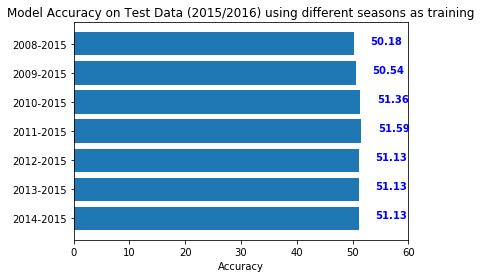

<function sklearn.metrics.classification.confusion_matrix>

In [116]:
from sklearn.metrics import confusion_matrix

accuracy_plot(predictions, Y_test)


In [51]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, predictCV)
accuracy

0.50997280145058932

### Feature Importance

In [53]:
xgb_new = xgb.XGBClassifier(learning_rate=0.1, n_estimators=85, max_depth=10, objective='multi:softmax')
xgb_new.fit(X_train, Y_train)
prediction = xgb_new.predict(X_test)

accuracy_xgb = accuracy_score(Y_test, prediction)
accuracy_xgb


0.50453309156844972

[('away_Midfielder_age', 3.0076873), ('home_Midfielder_age', 3.00424), ('home_Defender_age', 2.9732153), ('home_Midfielder_bmi', 2.9732153), ('away_Defender_age', 2.9680443), ('away_Goalkeeper_age', 2.9611499), ('away_Midfielder_bmi', 2.9594264), ('HOME_TEAM_FORM_GUIDE', 2.9577029), ('home_Defender_bmi', 2.8594575), ('home_Attacker_age', 2.8422215), ('away_Attacker_age', 2.8060257), ('home_Goalkeeper_age', 2.7077804), ('AWAY_DRAW_RATE', 2.7060568), ('away_Defender_bmi', 2.6681376), ('AWAY_TEAM_FORM_GUIDE', 2.6353891), ('HOME_DRAW_RATE', 2.5974698), ('AWAY_WIN_RATE', 2.4802647), ('home_Attacker_bmi', 2.4681995), ('away_Attacker_bmi', 2.3940847), ('HOME_WIN_RATE', 2.3665068), ('away_Defender_rating', 2.2406838), ('AWAY_WIN_RATE_AT_THIS_GROUND', 2.2286189), ('home_Defender_rating', 2.0855596), ('home_Midfielder_rating', 2.0217865), ('away_Goalkeeper_bmi', 1.914923), ('AWAY_DRAW_RATE_THIS_SEASON', 1.8890688), ('home_Goalkeeper_bmi', 1.8683857), ('HOME_WIN_RATE_THIS_SEASON', 1.863215), ('aw

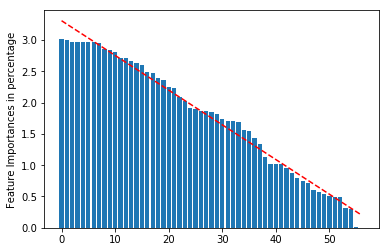

In [54]:
NUM_FEATURES = len(X_train.columns)
dict_feature_names_to_importances = dict(zip(X_train.columns, xgb_new.feature_importances_ * 100))
sorted_tuples = sorted(dict_feature_names_to_importances.items(), key=lambda x:x[1], reverse=True)
print (sorted_tuples[0: NUM_FEATURES - 1])

feature_names =list(zip(*sorted_tuples[0: NUM_FEATURES - 1]))[0]
importances = list(zip(*sorted_tuples[0: NUM_FEATURES - 1]))[1]
x_pos = np.arange(len(feature_names)) 

# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, importances, 1)
trendline = intercept + (slope * x_pos)

plt.plot(x_pos, trendline, color='red', linestyle='--')    
plt.bar(x_pos, importances,align='center')
plt.ylabel('Feature Importances in percentage')
plt.show()

### Ridge Classifier

In [118]:
from sklearn import linear_model

ridge_model = linear_model.RidgeClassifier()
predictions = run_model(ridge_model, season_datasets, test_data)


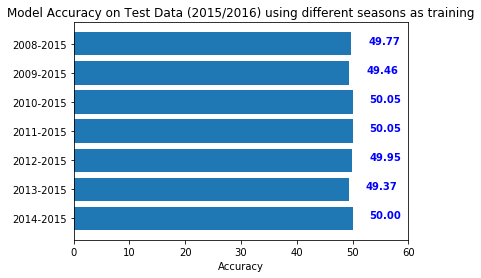

In [119]:
accuracy_plot(predictions, Y_test)

## Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier

rf_class = RandomForestClassifier(n_estimators=1000, oob_score=True,random_state=123456)
predictions = run_model(rf_class, season_datasets, test_data)

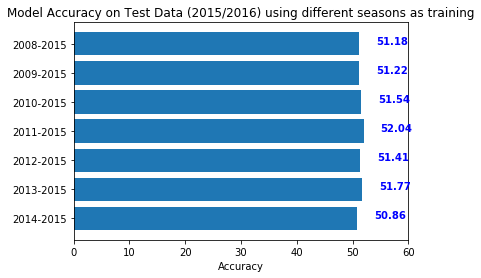

In [123]:
accuracy_plot(predictions, Y_test)